# AQI Prediction Model using Python

- PM2.5 PM10
- NO, NO2
- NH3 - Ammonia
- CO
- So2
- O3
- Benzene, Toluene, Xylene

In [1]:
# pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('air quality data.csv')
df.head() # Top 5 rows!

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# Shape - rows and cols!
df.shape

(29531, 16)

In [5]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
# to know the duplicate values
df.duplicated().sum()

np.int64(0)

In [7]:
# To check missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
# Drop the rows where 'AQI' has missing values
df.dropna(subset=['AQI'], inplace = True)

In [9]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [10]:
df.shape

(24850, 16)

In [11]:
# Summary of Statistics in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [12]:
# Percentage of the null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
Date           0.000000
City           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

#### Key Considerations:
- Xylene has the highest percentage of missing values - 61.86%
- PM10 and NH3 28 - 26 %

## Week 2 - Visualization

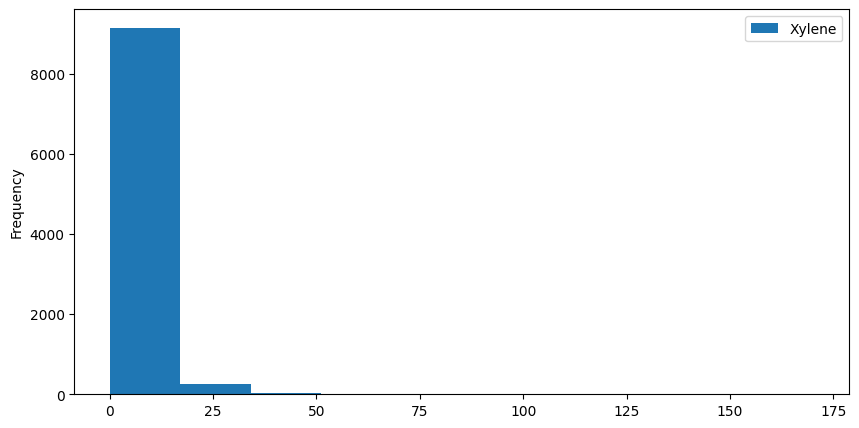

In [13]:
# Univariate analysis
df['Xylene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

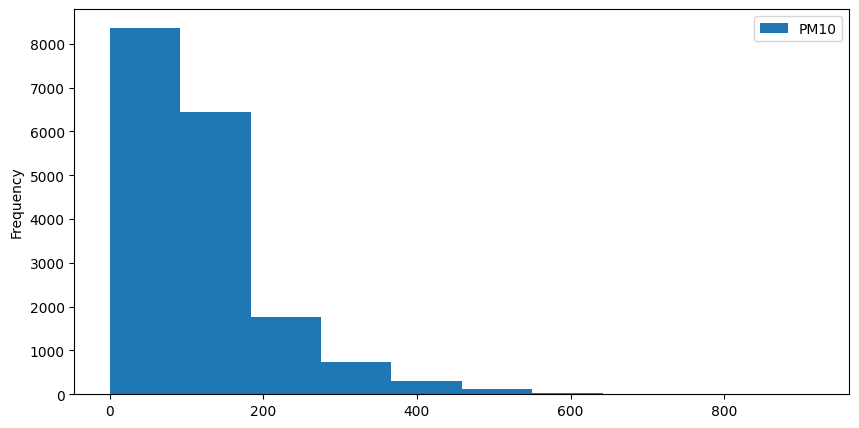

In [14]:
df['PM10'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

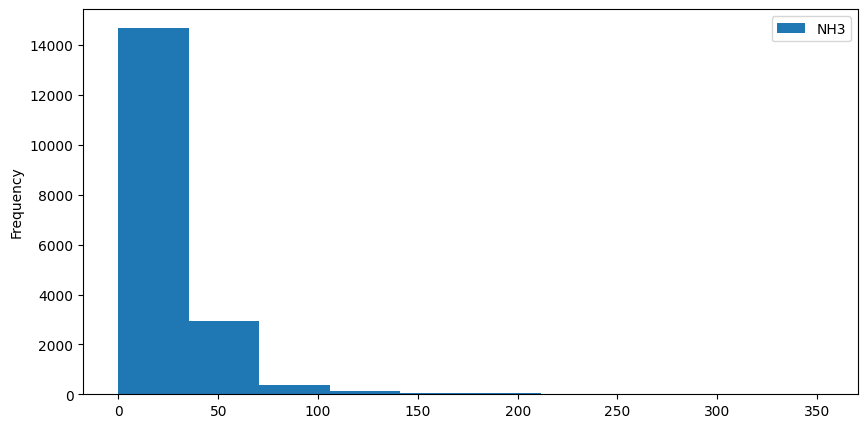

In [15]:
df['NH3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

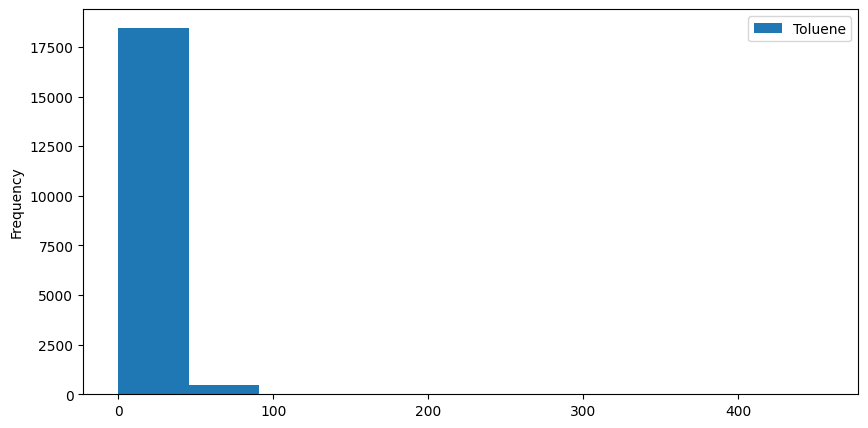

In [16]:
df['Toluene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

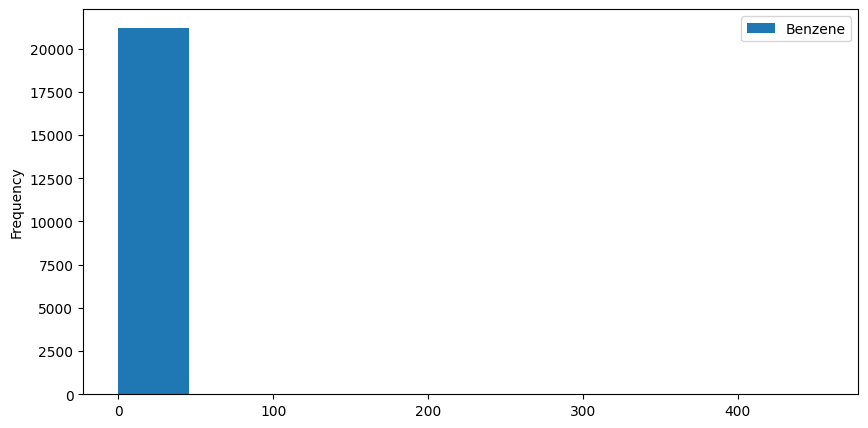

In [17]:
df['Benzene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

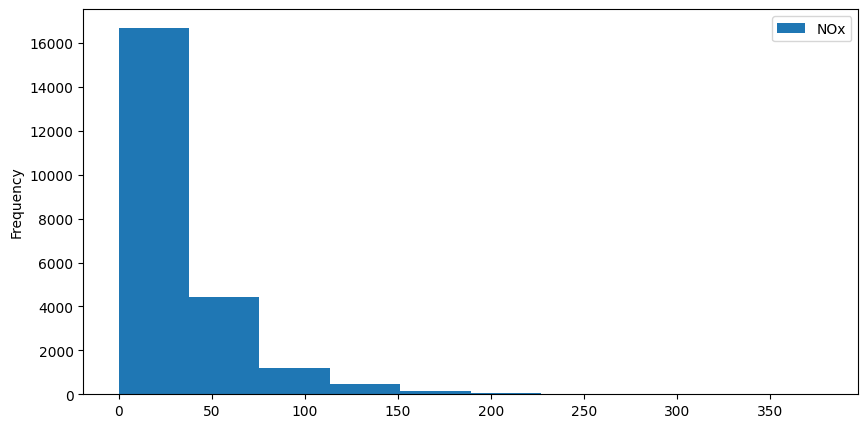

In [18]:
df['NOx'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

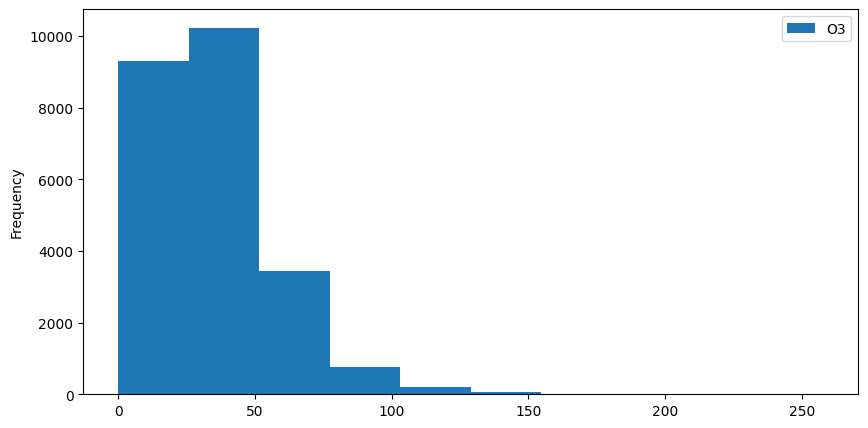

In [19]:
df['O3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

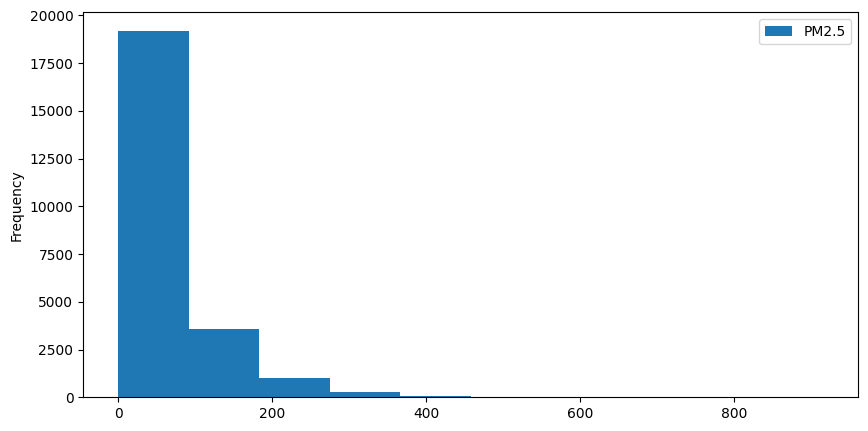

In [20]:
df['PM2.5'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

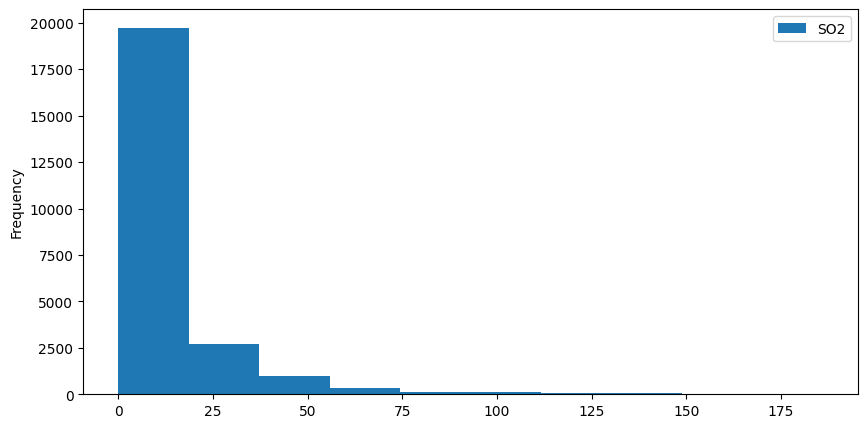

In [21]:
df['SO2'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

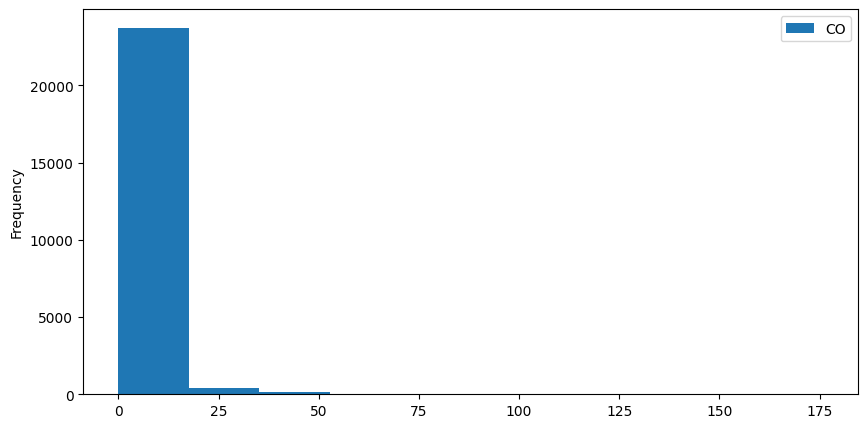

In [22]:
df['CO'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

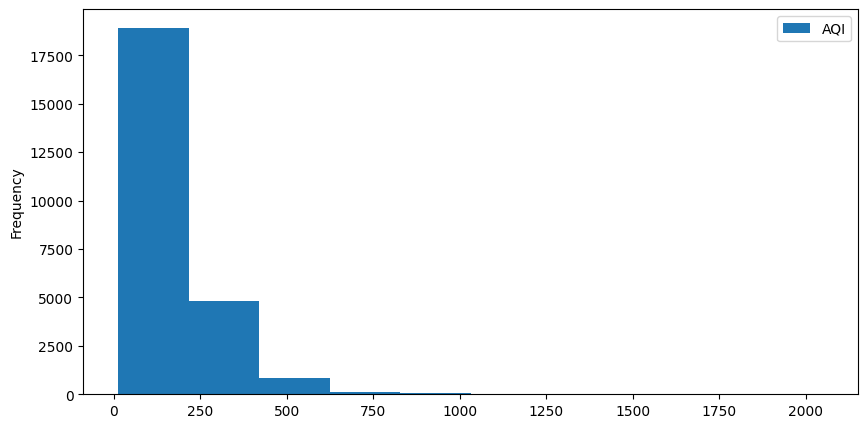

In [23]:
df['AQI'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

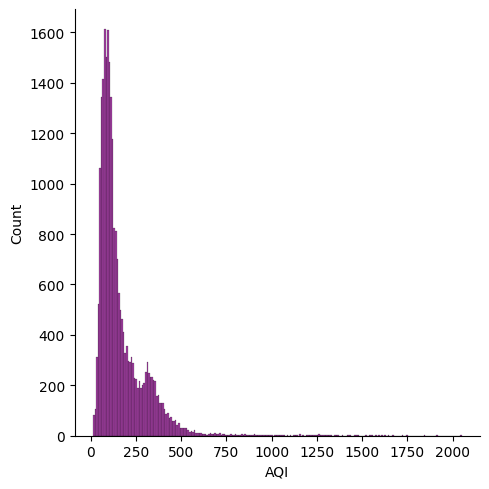

In [24]:
# Distribution of AQi from 2015 to 2020
sns.displot(df, x='AQI', color='purple')
plt.show()

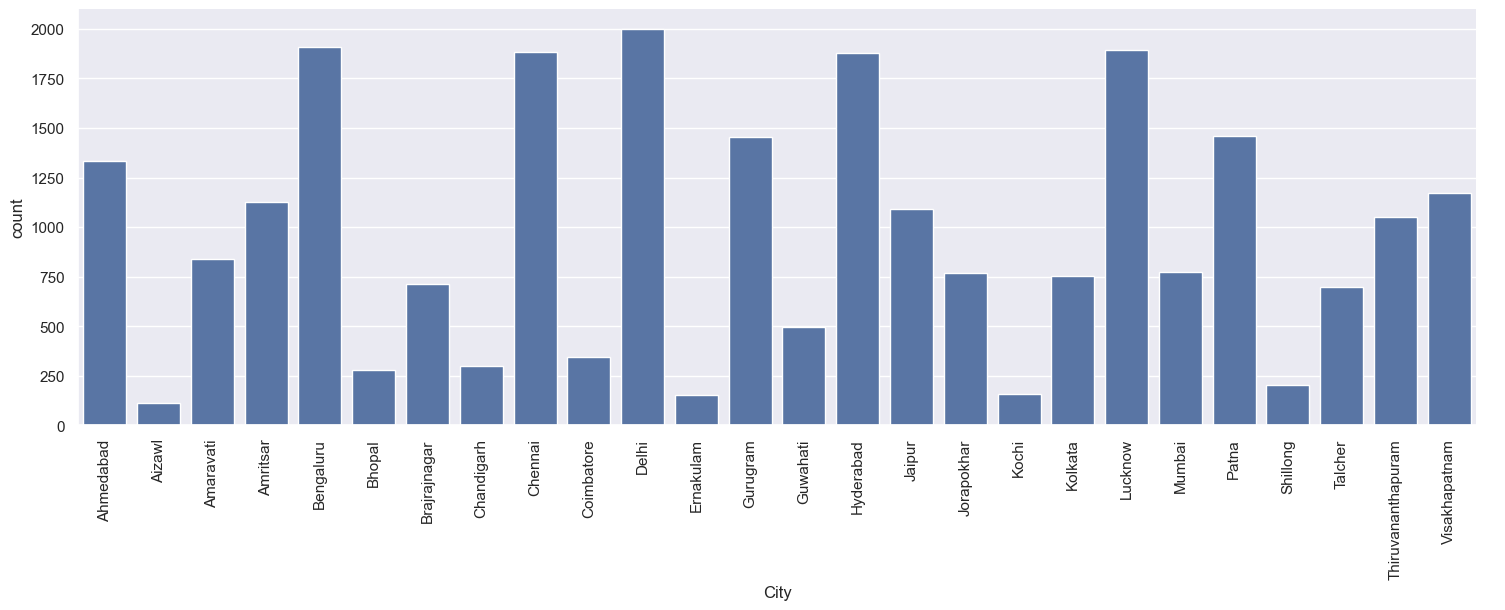

In [25]:
# Bivariate
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

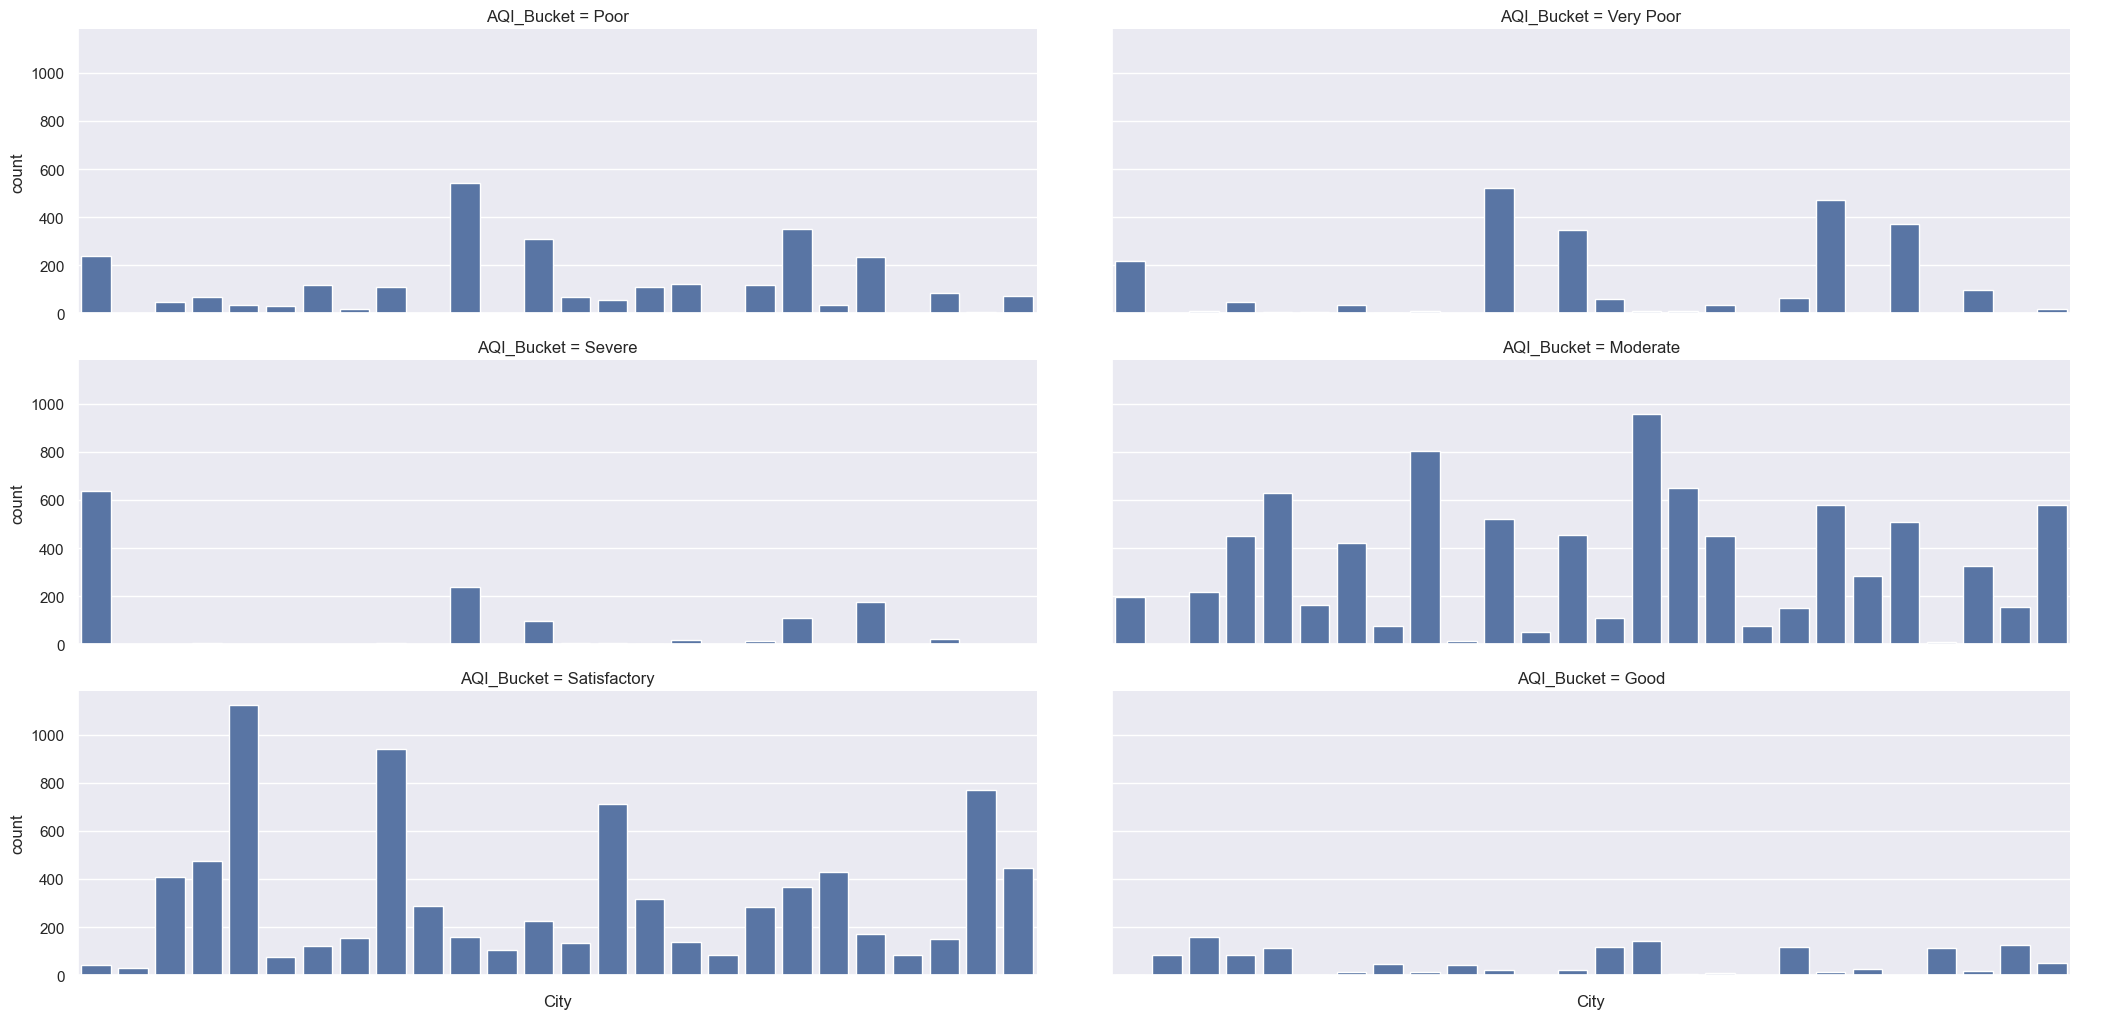

In [26]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, col="AQI_Bucket", col_wrap=2, 
                    height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)

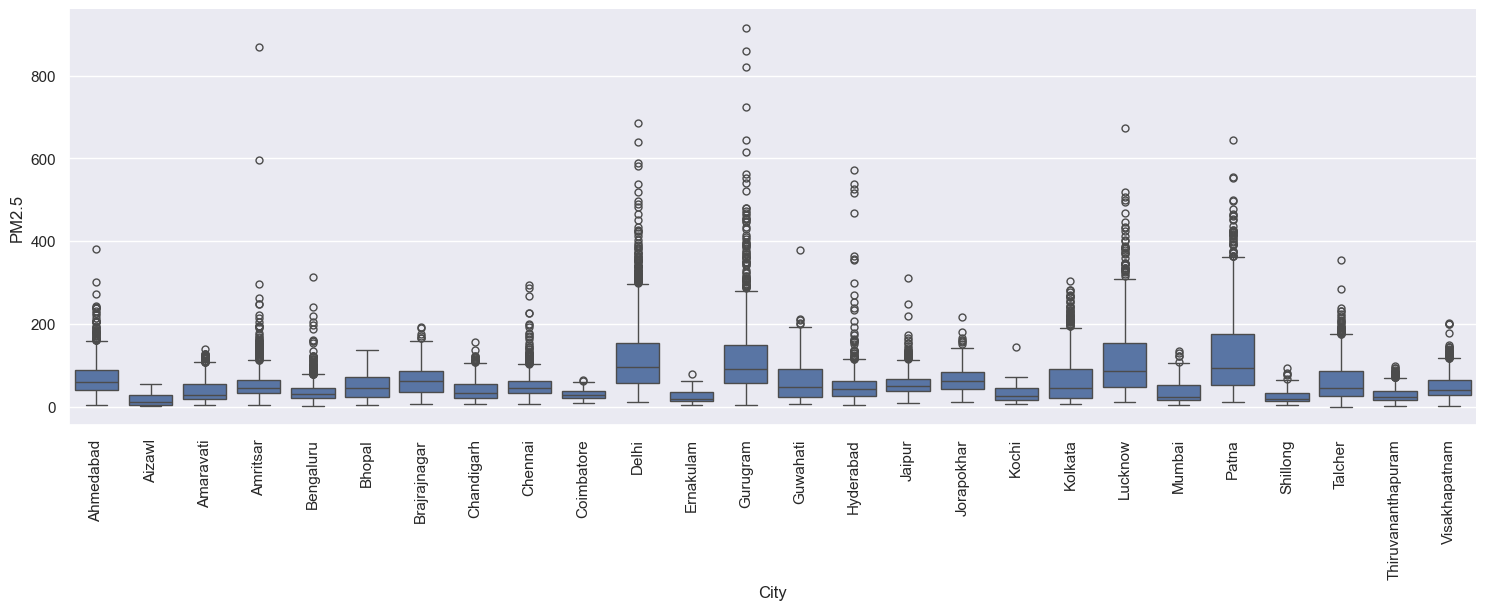

In [27]:
graph1 = sns.catplot(x='City', y='PM2.5', kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

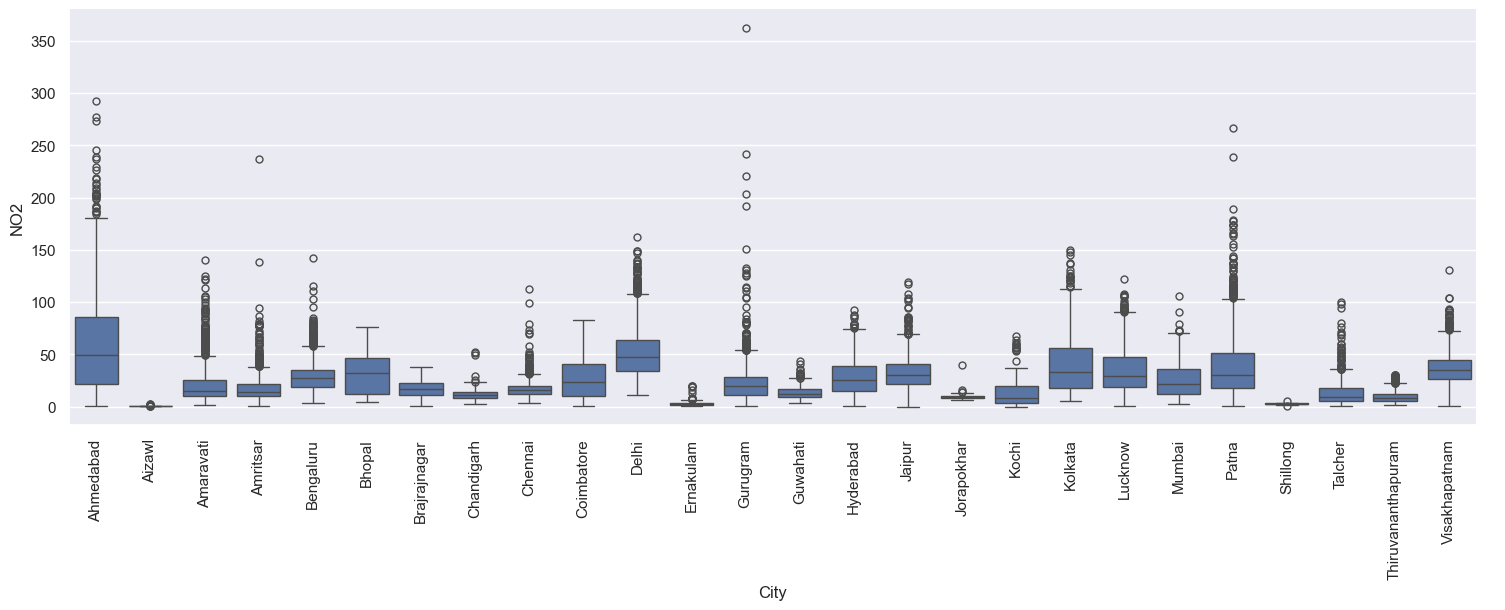

In [28]:
graph2 = sns.catplot(x='City', y='NO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

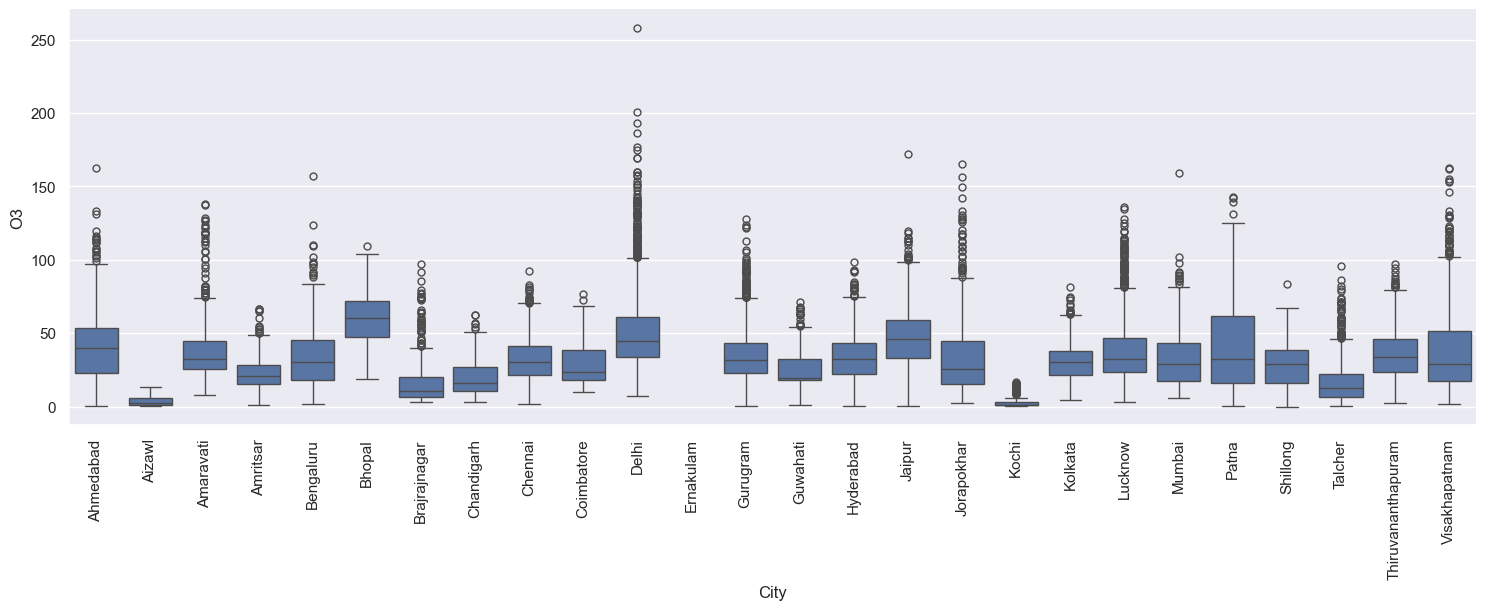

In [29]:
graph3 = sns.catplot(x='City', y='O3', kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

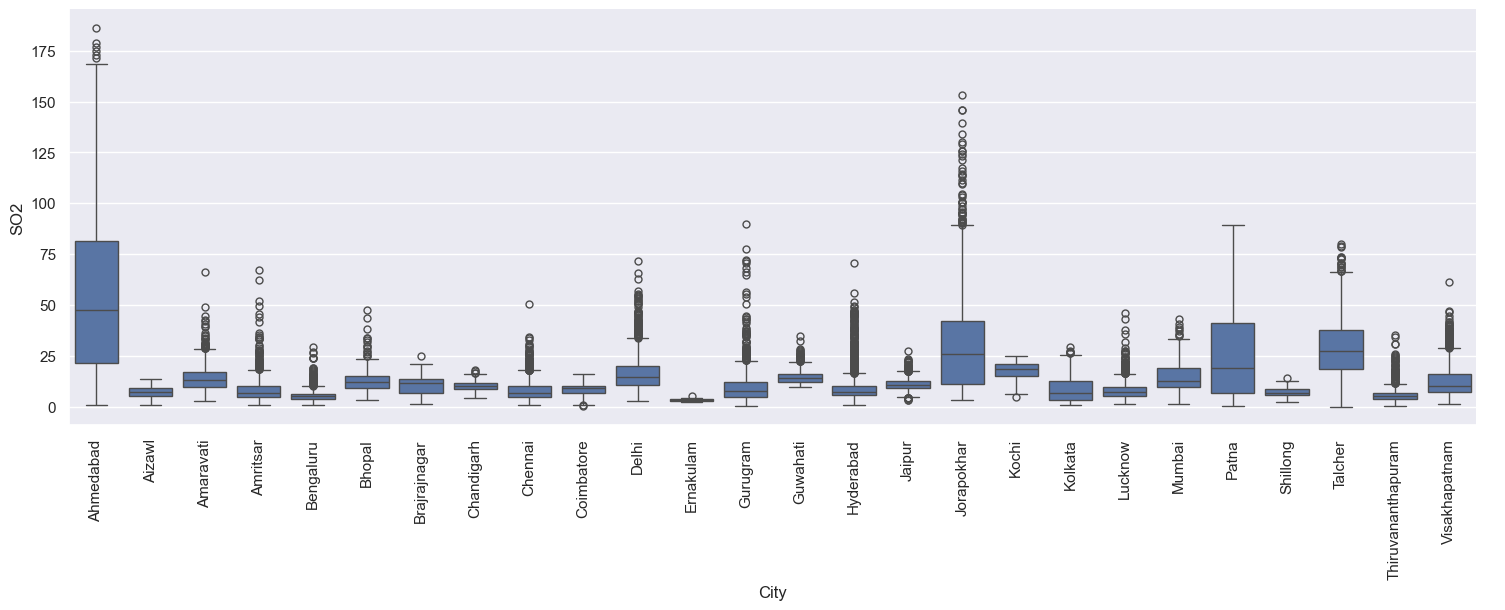

In [30]:
graph4 = sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

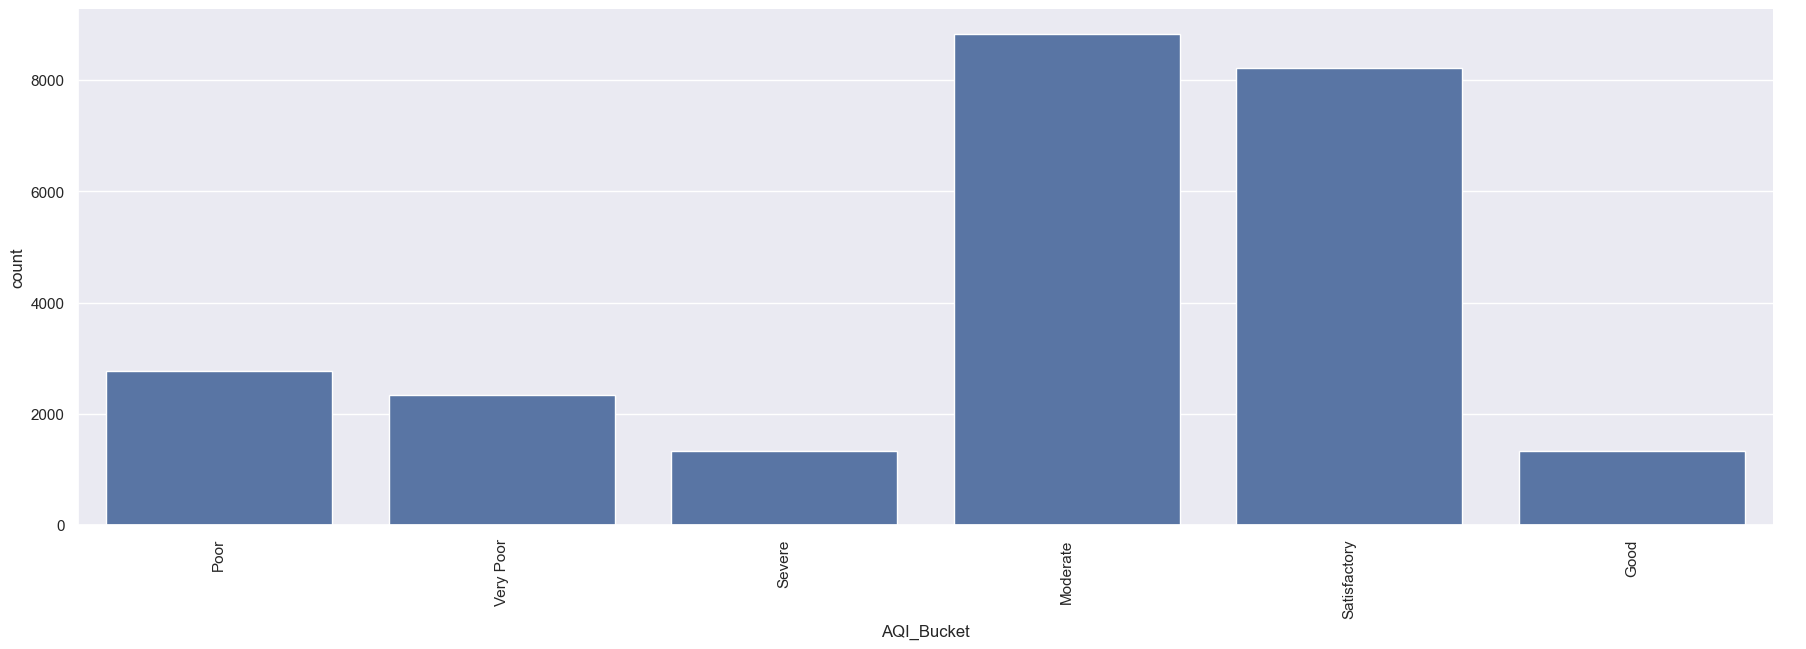

In [31]:
graph5 = sns.catplot(x='AQI_Bucket', data=df, kind='count', height=6, aspect=3)
graph5.set_xticklabels(rotation=90)

In [32]:
# TO check the null values
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [33]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [34]:
df = df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO": {np.nan:17.622421},
    "NO2": {np.nan:28.978391},
    "NOx": {np.nan:32.289012},
    "NH3": {np.nan:23.848366},
    "CO":  {np.nan:2.345267},
    "SO2": {np.nan:34.912885},
    "O3": {np.nan:38.320547},
    "Benzene": {np.nan:3.458668},
    "Toluene": {np.nan:9.525714},
    "Xylene": {np.nan:3.588683}
})

In [35]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [36]:
df = df.drop(['AQI_Bucket'], axis=1)

In [37]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

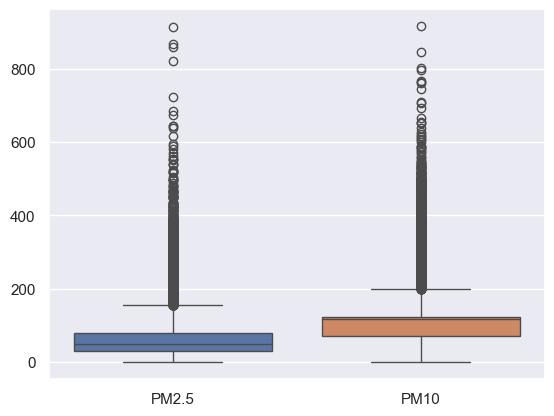

In [38]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

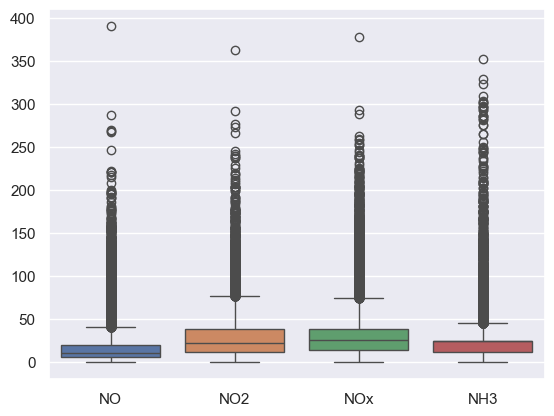

In [39]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

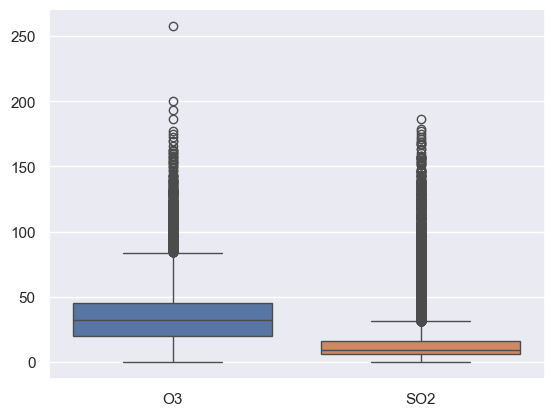

In [40]:
sns.boxplot(data=df[['O3', 'SO2']])

In [41]:
# IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df

In [42]:
df = replace_outliers(df)

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.616411,6.091530,0.01,5.79,9.430000,15.940000,31.16
O3,24850.0,33.288444,17.509123,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<Axes: >

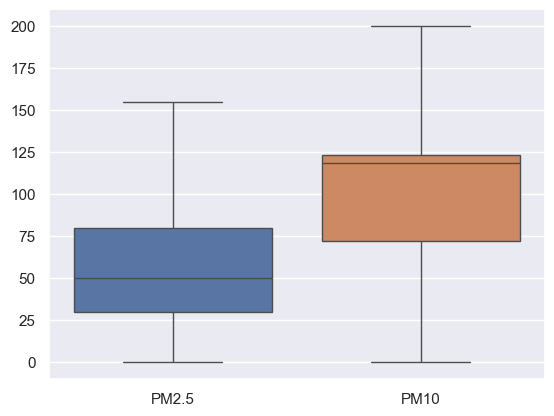

In [44]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

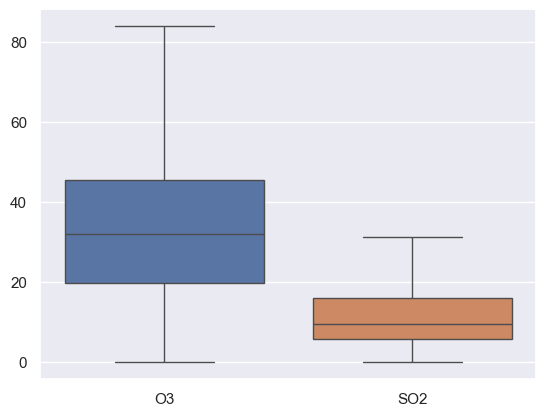

In [45]:
sns.boxplot(data=df[['O3', 'SO2']])

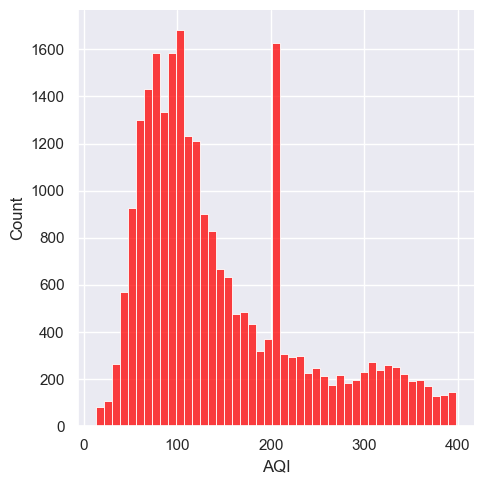

In [46]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [47]:
df1 = df.drop(columns=['City'])

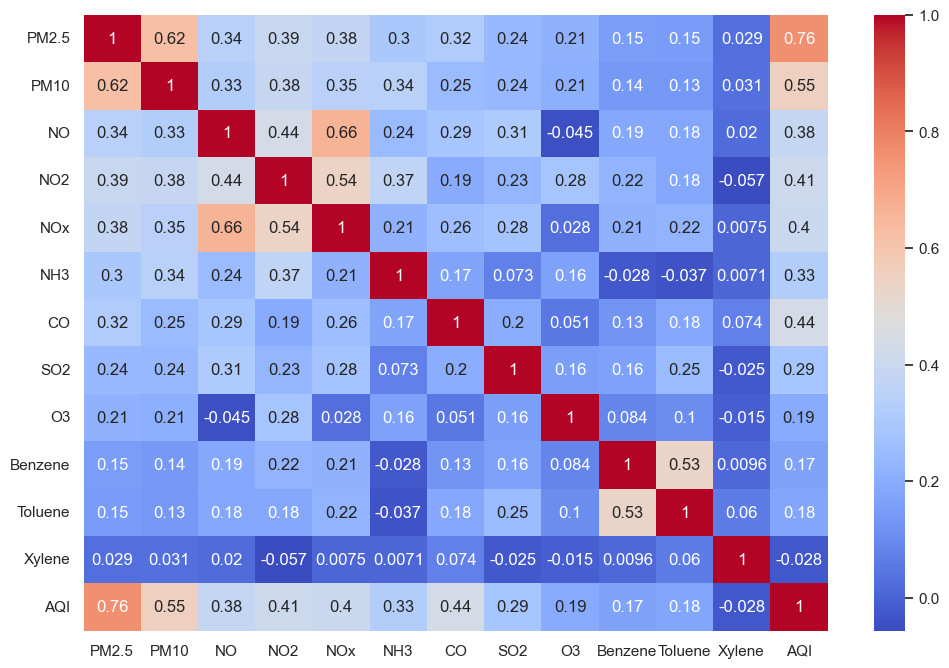

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

# Week 3 - Data Modeling - 10 March 2025

In [49]:
df.drop(['Date', 'City'], axis = 1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.46,0.06,3.588683,208.0


In [50]:
# Scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[ 0.87831149,  0.43765334, -0.63658947, ..., -1.32511601,
        -0.29450027,  0.70999757],
       [ 0.77494642,  0.43765334,  0.15319907, ..., -1.32511601,
         2.69513707,  2.07124258],
       [ 1.23616198,  0.43765334,  1.35614288, ..., -1.32298652,
         0.50873294,  0.69855854],
       ...,
       [-1.01367767, -0.91151782, -1.03376636, ..., -1.32298652,
        -1.17169925, -0.90290618],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.32511601,
        -1.17169925, -1.06305265],
       [-1.26219369, -0.90460877, -1.3818668 , ...,  0.70336955,
         0.50873294, -1.10880878]], shape=(24850, 13))

In [51]:
df = pd.DataFrame(df1, columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.873951,1.511903,-1.136985,-1.325116,-0.294500,0.709998
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.873951,0.691599,-1.126045,-1.325116,2.695137,2.071243
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.873951,0.691599,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.873951,0.691599,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.873951,0.691599,-0.896298,-1.312339,0.508733,0.698559


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [54]:
# Feature & Target Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [55]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.873951,1.511903,-1.136985,-1.325116,-0.294500
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.873951,0.691599,-1.126045,-1.325116,2.695137
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.873951,0.691599,-1.016642,-1.322987,0.508733
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.873951,0.691599,-0.929119,-1.316598,0.508733
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.873951,0.691599,-0.896298,-1.312339,0.508733


In [56]:
# Split the data into training and testing data - Training set - 80% | Testing set - 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X Test',X_test.shape)
print('Shape of y Train',y_train.shape)
print('Shape of y Test',y_test.shape)

Shape of X Train (19880, 12)
Shape of X Test (4970, 12)
Shape of y Train (19880,)
Shape of y Test (4970,)


In [57]:
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predicting the values:
train_pred = LR.predict(X_train) # Predicting train
test_pred = LR.predict(X_test) # Predicting test

In [59]:
# Evaluation for Linear Regression
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', LR.score(X_train, y_train))
print('R Squared value on Test = ', LR.score(X_test, y_test))

RMSE Train Data =  0.5915898876030431
RMSE Test Data =  0.5816350458940677
____________________________________________________________
R Squared value for Train =  0.6512777604084752
R Squared value on Test =  0.6567255270452733


In [60]:
# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [61]:
# Predicting the values:
train_pred = knn.predict(X_train) # Predicting train
test_pred = knn.predict(X_test) # Predicting test

# Evaluation for KNN
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', knn.score(X_train, y_train))
print('R Squared value on Test = ', knn.score(X_test, y_test))

RMSE Train Data =  0.38862933206832123
RMSE Test Data =  0.47807250626828707
____________________________________________________________
R Squared value for Train =  0.8495094206691607
R Squared value on Test =  0.7680854949381535


In [62]:
# Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
# Predicting the values:
train_pred = dtr.predict(X_train) # Predicting train
test_pred = dtr.predict(X_test) # Predicting test

# Evaluation for Decision Tree Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', dtr.score(X_train, y_train))
print('R Squared value on Test = ', dtr.score(X_test, y_test))

RMSE Train Data =  0.02594854601836432
RMSE Test Data =  0.5522107690999982
____________________________________________________________
R Squared value for Train =  0.9993290900734868
R Squared value on Test =  0.690578761925292


In [64]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
# Predicting the values:
train_pred = rfr.predict(X_train) # Predicting train
test_pred = rfr.predict(X_test) # Predicting test

# Evaluation for Randome Forest Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', rfr.score(X_train, y_train))
print('R Squared value on Test = ', rfr.score(X_test, y_test))

RMSE Train Data =  0.14972205717401343
RMSE Test Data =  0.39232507101573794
____________________________________________________________
R Squared value for Train =  0.9776637771964389
R Squared value on Test =  0.8438174534267643
